COVID-19 Data Analysis

Global daily totals:             Confirmed  Recovered  Deaths
Date                                    
2020-01-22        557         30      17
2020-01-23        657         32      18
2020-01-24        944         39      26
2020-01-25       1437         42      42
2020-01-26       2120         56      56


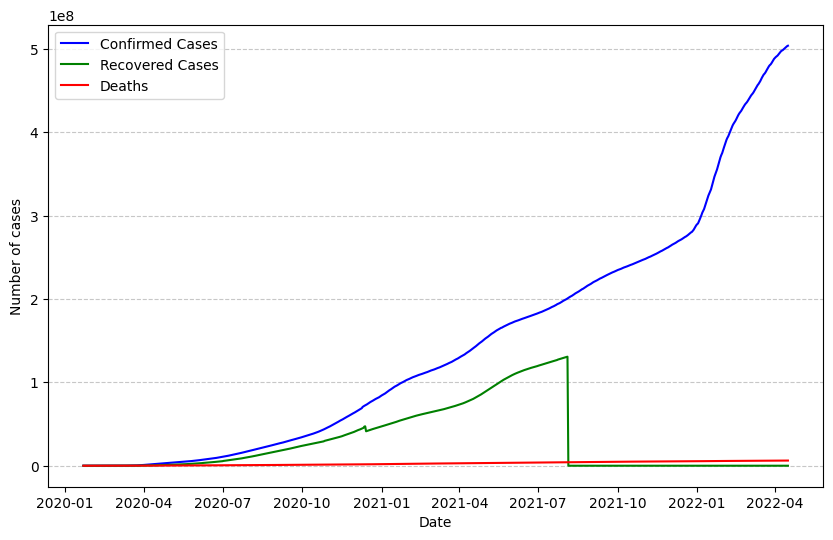


 Correlational matrix            Confirmed  Recovered    Deaths
Confirmed   1.000000  -0.070744  0.956593
Recovered  -0.070744   1.000000  0.055685
Deaths      0.956593   0.055685  1.000000


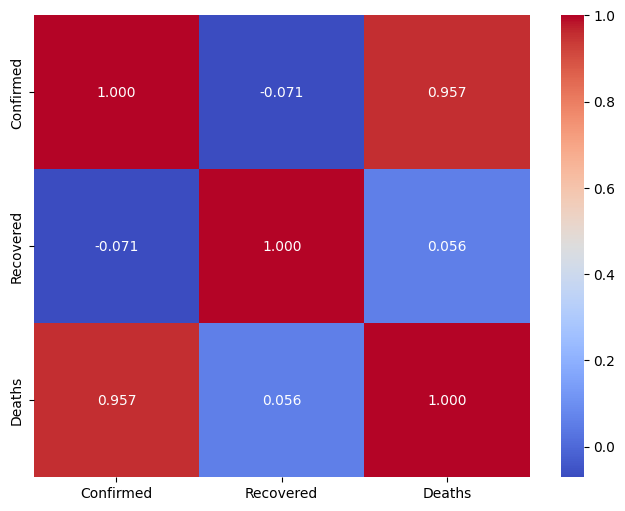

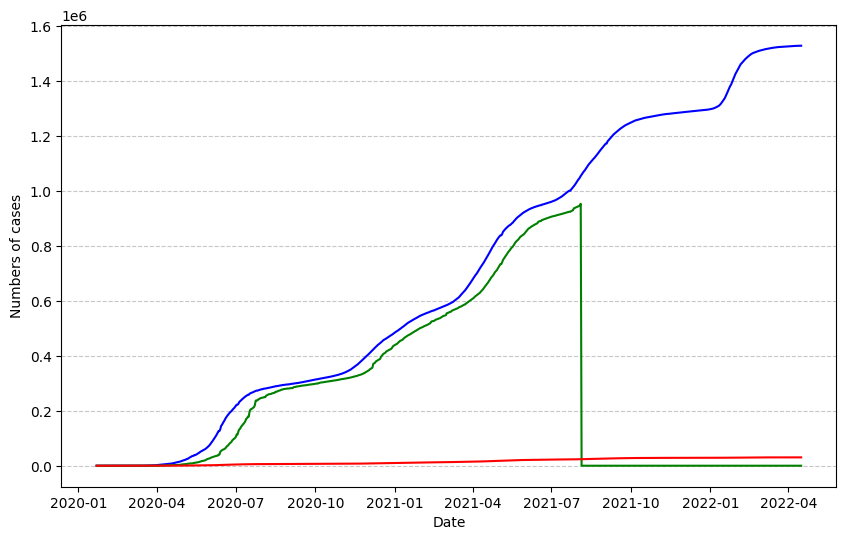

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Ensure the 'Date' column is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Group by date and calculate trends
# Calculate global daily totals
global_daily = df.groupby('Date')[['Confirmed','Recovered','Deaths']].sum()
print("Global daily totals:",global_daily.head())

# Step 3: Create time-series plots
plt.figure(figsize=(10,6))
plt.plot(global_daily.index, global_daily['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_daily.index, global_daily['Recovered'], label='Recovered Cases', color='green')
plt.plot(global_daily.index, global_daily['Deaths'], label='Deaths', color='red')
plt.title=('Global covid-19 trend')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Step 4: Correlation Analysis
# Focus on a subset of columns for correlation
numerical_columns = ['Confirmed','Recovered','Deaths']
correlation_matrix = global_daily[numerical_columns].corr()
print("\n Correlational matrix",correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title=('correlational matrix heatmap')
plt.show()


# Step 5: Dashboard-like Comparison Plot
# Example: Comparing Confirmed Cases vs Recoveries for a specific country
country_data = df[df['Country'] == 'Pakistan']
plt.figure(figsize=(10,6))
plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered Cases', color='green')
plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths', color='red')
plt.title=('Pakistan: Confirmed Cases vs Recoveries')
plt.xlabel('Date')
plt.ylabel('Numbers of cases')
plt.legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()